In [1]:
import numpy as np
from empiricaldist import Pmf
from scipy.stats import binom

def make_binomial(n, p):
    """Make a binomial distribution.
    
    n: number of trials
    p: probability of success
    
    returns: Pmf representing the distribution of k
    """
    ks = np.arange(n+1)
    ps = binom.pmf(ks, n, p)
    return Pmf(ps, ks)




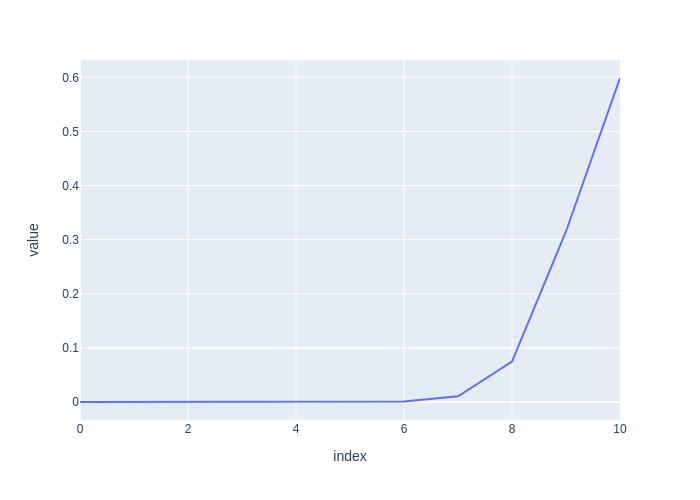
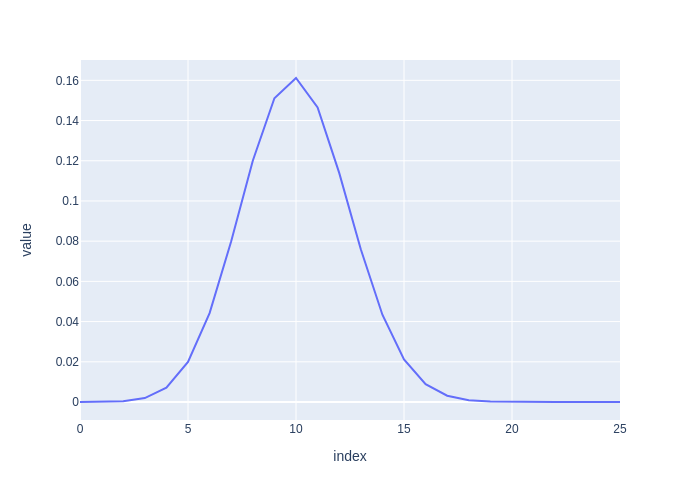
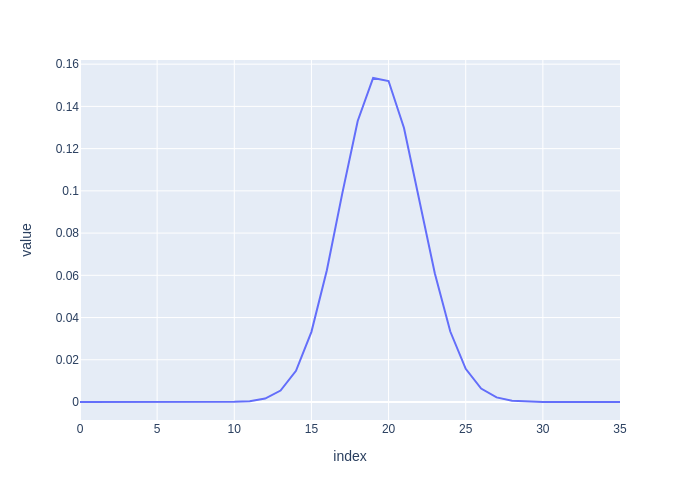

In [5]:
import pyjviz

n = 35

num_sensitive = 10
with pyjviz.CB(f"{num_sensitive} out of {n}") as b:
    num_insensitive = n - num_sensitive
    dist_sensitive = make_binomial(num_sensitive, 0.95).make_plot()
    dist_insensitive = make_binomial(num_insensitive, 0.40).make_plot()
    dist_total = Pmf.add_dist(dist_sensitive, dist_insensitive).make_plot()
    t = pyjviz.Text('add_dist', 'add_dist')
    pyjviz.Arrow(dist_sensitive, t)
    pyjviz.Arrow(dist_insensitive, t)
    pyjviz.Arrow(t, dist_total)
    
pyjviz.show(vertical = True)


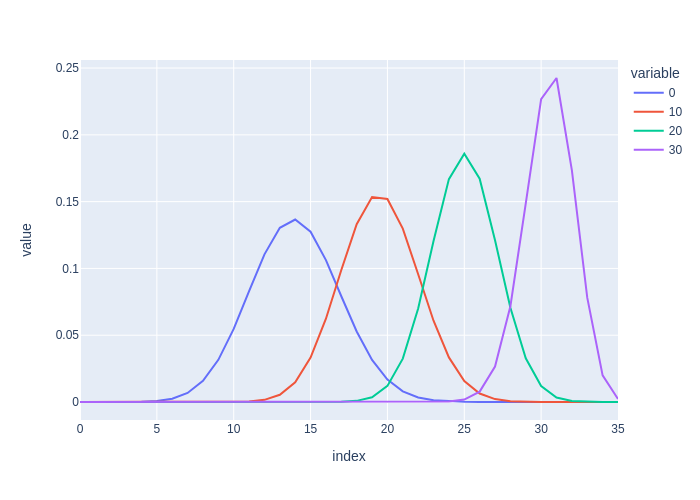
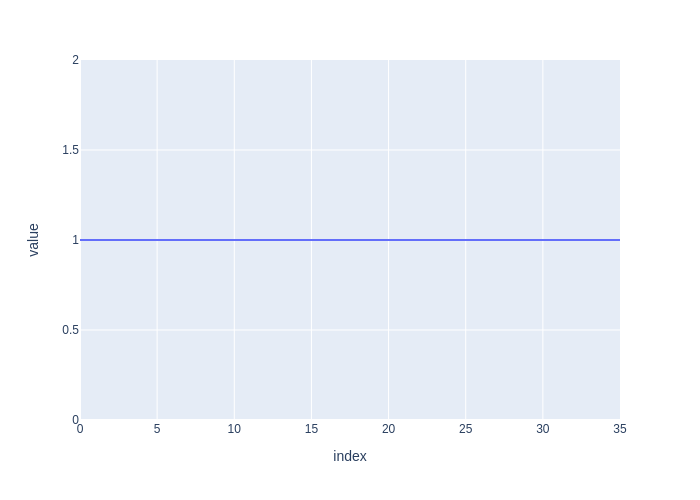
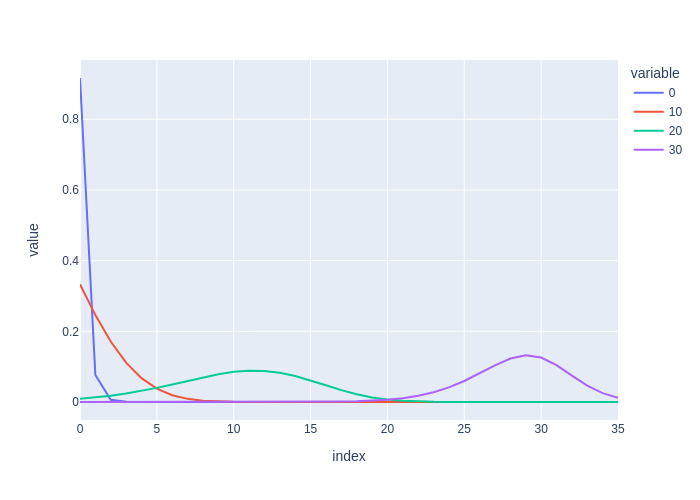

In [18]:
import pandas as pd
with pyjviz.CB():
    table = pd.DataFrame()
    for num_sensitive in range(0, n+1):
        num_insensitive = n - num_sensitive
        dist_sensitive = make_binomial(num_sensitive, 0.95)
        dist_insensitive = make_binomial(num_insensitive, 0.4)
        dist_total = Pmf.add_dist(dist_sensitive, dist_insensitive)    
        table[num_sensitive] = dist_total
        
    few_likelihoods = table[[0,10,20,30]].make_plot()

    hypos = np.arange(n+1)
    prior = Pmf(1, hypos).make_plot()
    posteriors = pd.DataFrame()
    #for num_sensitive in [12, 20]:
    for num_sensitive in [0, 10, 20, 30]:
        likelihood = table.loc[num_sensitive]
        posterior = prior * likelihood
        posterior.normalize()
        posteriors[num_sensitive] = posterior

    few_posteriors = posteriors.make_plot()

    update_t = pyjviz.Text('update', 'update')
    pyjviz.Arrow(prior, update_t)
    pyjviz.Arrow(few_likelihoods, update_t)
    pyjviz.Arrow(update_t, few_posteriors)
    
pyjviz.show(vertical = False)